In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

43468


In [2]:
# Required plotting setting
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
plt.rc('font', serif='Arial')

from ImageAnalysis3.figure_tools import _single_col_width, _font_size, _ticklabel_size,_ticklabel_width

In [3]:
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
sns.set_context("paper", rc={"font.size":_font_size,"axes.titlesize":_font_size+1,"axes.labelsize":_font_size})   

In [4]:
postanalysis_folder = r'\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis'
print(postanalysis_folder)
dark_mode = True
if dark_mode:
    figure_folder = os.path.join(postanalysis_folder, 'Figures_0903_dark')
    plt.style.use('dark_background')
else:
    figure_folder = os.path.join(postanalysis_folder, 'Figures_0817')
print(figure_folder)

gene_figure_folder = os.path.join(figure_folder, 'Gene_example')

if not os.path.exists(gene_figure_folder):
    print(f"Create: {gene_figure_folder}")
    os.makedirs(gene_figure_folder)
else:
    print(f"Use: {gene_figure_folder}")

\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis
\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\Figures_0903_dark
Use: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\Figures_0903_dark\Gene_example


## load codebook

In [5]:
import pandas as pd
codebook = pd.read_csv(r'\\10.245.74.158\Chromatin_NAS_8\Exported_data\20220713-Export\merged_codebook.csv')

from ImageAnalysis3.structure_tools import distance
chr_2_indices, chr_2_orders = distance.Generate_PlotOrder(codebook, codebook, sort_by_region=False)

In [6]:
ensemble_pc1_filename = os.path.join(postanalysis_folder, 'ensemble_pc1.npy')

ensemble_normed_PC1 = np.load(ensemble_pc1_filename)
print(ensemble_normed_PC1.shape)

# define AB
ensemble_AB_dict = {}
AB_th = -0.5
ensemble_AB_dict['A'] = np.where(ensemble_normed_PC1 > AB_th)[0]
ensemble_AB_dict['B'] = np.where(ensemble_normed_PC1 <= AB_th)[0]

# by chr
ensemble_chr_2_AB = {}
for _chr in chr_2_indices:
    _chr_AB = {
        'A':np.array([list(chr_2_indices[_chr]).index(_ind) 
                      for _ind in np.intersect1d(chr_2_indices[_chr], ensemble_AB_dict['A'])], dtype=np.int32),
        'B':np.array([list(chr_2_indices[_chr]).index(_ind) 
                      for _ind in np.intersect1d(chr_2_indices[_chr], ensemble_AB_dict['B'])], dtype=np.int32),
    }
    ensemble_chr_2_AB[_chr] = _chr_AB

(1981,)


In [7]:
result_folder = r'\\crick\SSD_0\Shiwei\DNA_MERFISH_analysis\Figures\draft_v1\Fig2_AB_chrom_analysis_whole_chr7\figures'


<IPython.core.display.Javascript object>


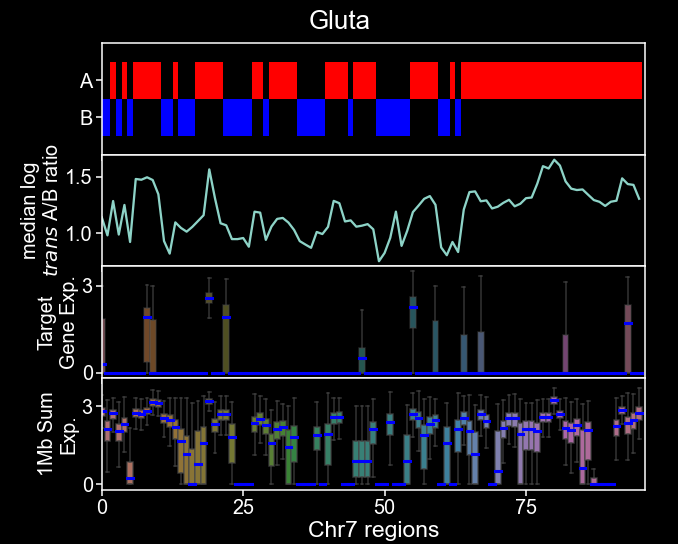

<IPython.core.display.Javascript object>


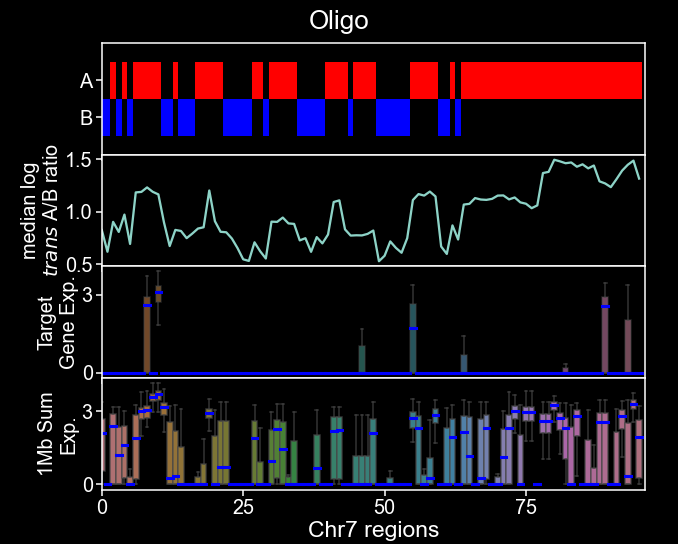

<IPython.core.display.Javascript object>


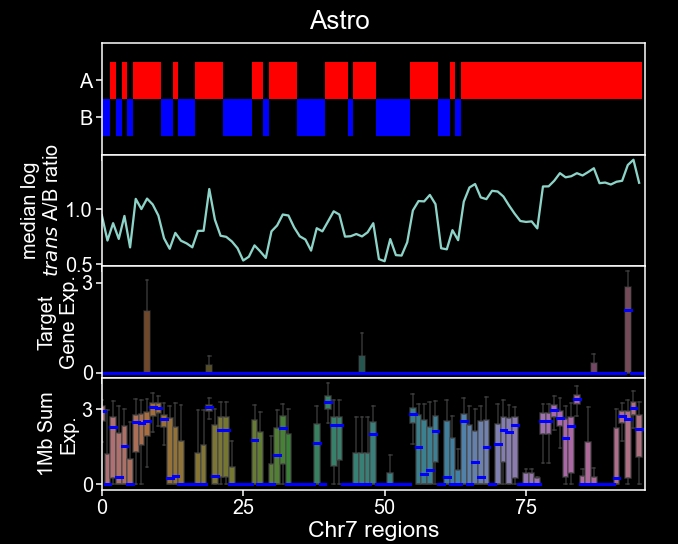

In [8]:
sel_chr = '7'
_group = 'Gluta'

for _group in ['Gluta', 'Oligo', 'Astro']:


    df_plot_list = []
    for _savename in ['AB_id.csv','transAB_ratio.csv','cisAB_ratio.csv', 'Marker.csv','Adjacent.csv']:
        _savename = f'{_group}_chr{sel_chr}_{_savename}'
        _df_plot = pd.read_csv(os.path.join(result_folder, _savename), index_col=0)
        df_plot_list.append(_df_plot)
    # plot
    fig, axes = plt.subplots(4,1, figsize=(_single_col_width*1.25, _single_col_width),
                             sharex=True, dpi=200)
    comp_ax, ratio_ax, gene_ax, region_ax = axes
    # 1
    comp_ax.bar(ensemble_chr_2_AB[sel_chr]['A'], 1, 
                color='r',width=1, bottom=0)
    comp_ax.bar(ensemble_chr_2_AB[sel_chr]['B'], -1, 
                color='b',width=1, bottom=0)
    comp_ax.set_yticks([-0.5, 0.5])
    comp_ax.set_yticklabels(['B','A'])
    comp_ax.set_ylim([-1.5,1.5])
    # 2
    median_log_AB_ratio = np.nanmedian(df_plot_list[2].values, axis=0)
    ratio_ax.plot(median_log_AB_ratio, linewidth=0.75)
    #ratio_ax.hlines(np.log(len(ensemble_AB_dict['A']) / len(ensemble_AB_dict['B'])), 0, len(median_log_AB_ratio),
    #                color='black', linewidth=0.5, linestyle='dashed')
    #ratio_ax.set_yticks([0.5,2])
    ratio_ax.set_ylabel('median log\n$\it{trans}$ A/B ratio', fontsize=_font_size-1, labelpad=1)
    # 3.
    sns.boxplot(ax=gene_ax,data=df_plot_list[3], 
                linewidth=0.5,
                width=1, fliersize=0.0,showbox=True,
                        whiskerprops = dict(alpha=.75),
                        flierprops = dict(alpha=.75),
                        capprops = dict(alpha=.75),
                        boxprops = dict(alpha=.5),
                        medianprops = dict(color='blue', linewidth=1),
               )
    gene_ax.set_yticks([0,3])
    gene_ax.set_ylabel('Target\nGene Exp.', fontsize=_font_size-1, labelpad=1)

    sns.boxplot(ax=region_ax,data=df_plot_list[4], 
                linewidth=0.5,
                width=1, fliersize=0.0,showbox=True,
                        whiskerprops = dict(alpha=.75),
                        flierprops = dict(alpha=.75),
                        capprops = dict(alpha=.75),
                        boxprops = dict(alpha=.75),
                        medianprops = dict(color='blue', linewidth=1),
               )
    region_ax.set_yticks([0,3])
    region_ax.set_ylabel('1Mb Sum\nExp.', fontsize=_font_size-1, labelpad=1)
    region_ax.set_xlabel(f'Chr{sel_chr} regions', fontsize=_font_size, labelpad=1)


    for _ax in axes:
        _ax.tick_params('both', labelsize=_font_size-1, 
                        width=_ticklabel_width, length=_ticklabel_size,
                        labelleft=True,
                        pad=1, ) # remove bottom ticklabels for ax1
        [i[1].set_linewidth(_ticklabel_width) for i in _ax.spines.items()]

    comp_ax.set_xlim([-0., len(chr_2_indices[sel_chr])])
    region_ax.set_xticks(np.arange(0, len(chr_2_indices[sel_chr]), 25))
    fig.suptitle(f'{_group}', fontsize=_font_size+1, )
    fig.subplots_adjust(wspace=0.1, hspace=0., left=0.15, right=0.95, top=0.92, bottom=0.1)
    fig.savefig(os.path.join(gene_figure_folder, f"{_group}_chr{sel_chr}_AB_gene_summary.pdf"),
                transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=300)
    fig.savefig(os.path.join(gene_figure_folder, f"{_group}_chr{sel_chr}_AB_gene_summary.png"),
                transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=300)
    plt.show()


# Scatter and box

In [9]:
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
sns.set_context("paper", rc={"font.size":_font_size,"axes.titlesize":_font_size+1,"axes.labelsize":_font_size})   


# load ABratio
transABratio_dict = np.load(os.path.join(postanalysis_folder, 'transABRatio_ensembleAB_notNorm_r0.5_byclass.pkl'), allow_pickle=True)
# AB vec
AB_vec = np.array(['A']*len(codebook), dtype=object)
AB_vec[ensemble_AB_dict['A']] = 'A'
AB_vec[ensemble_AB_dict['B']] = 'B'

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
result_folder = r'\\crick\SSD_0\Shiwei\DNA_MERFISH_analysis\Figures\draft_v1\Fig2_AB_region_expression\analyses'
adj_sizes = ['100kb','1Mb', '2Mb']
cell_types = ['Gluta', 'GABA', 'Astro', 'Oligo', 'Endo', 'Micro']


E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


<IPython.core.display.Javascript object>


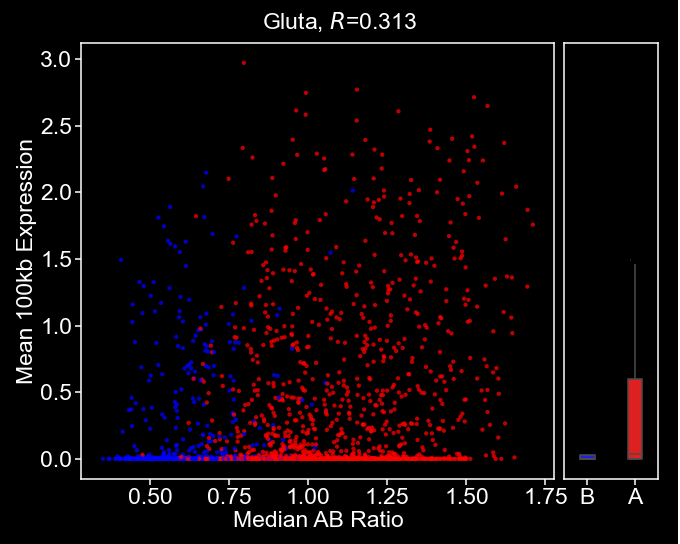

E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


<IPython.core.display.Javascript object>


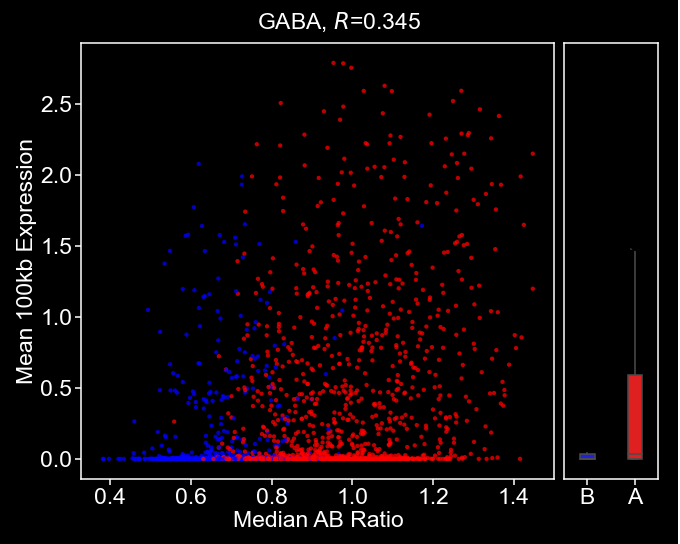

E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


<IPython.core.display.Javascript object>


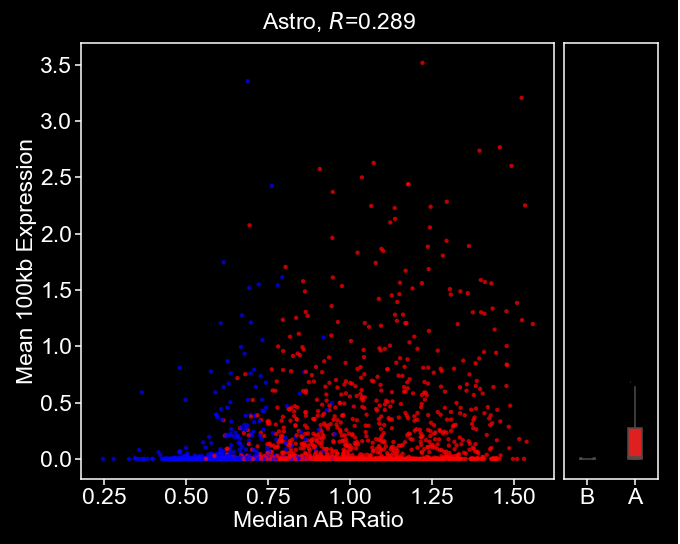

E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


<IPython.core.display.Javascript object>


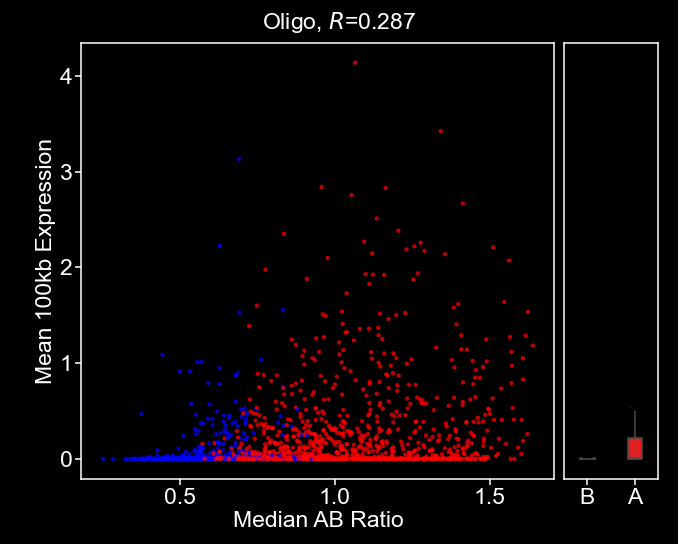

E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


<IPython.core.display.Javascript object>


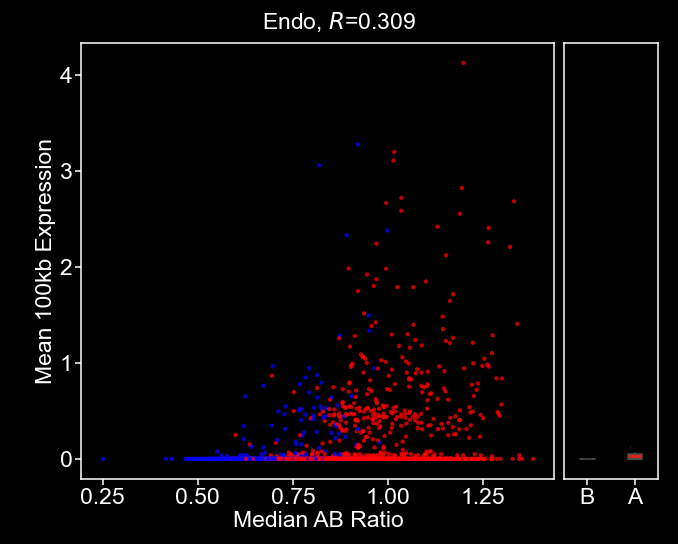

E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


<IPython.core.display.Javascript object>


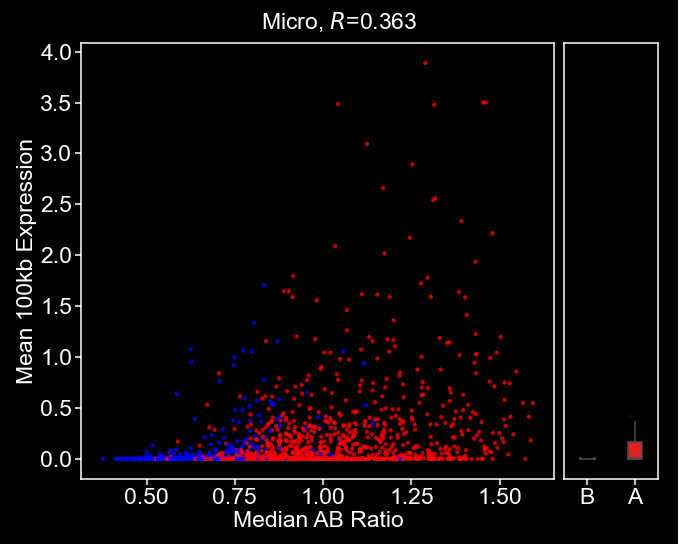

E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


<IPython.core.display.Javascript object>


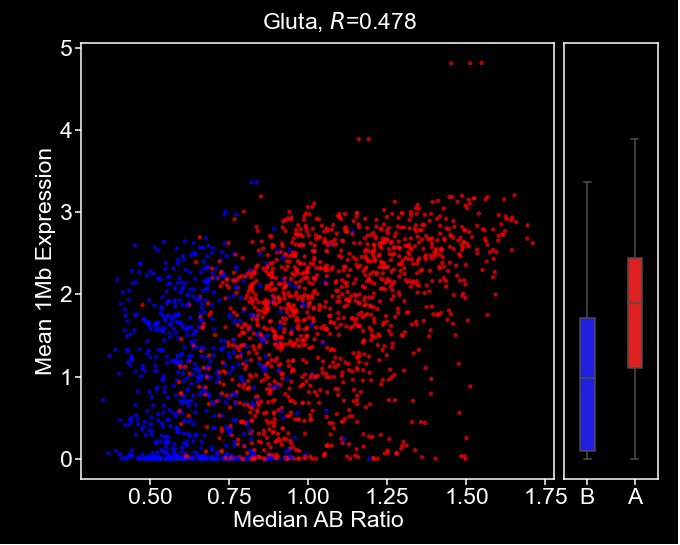

E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


<IPython.core.display.Javascript object>


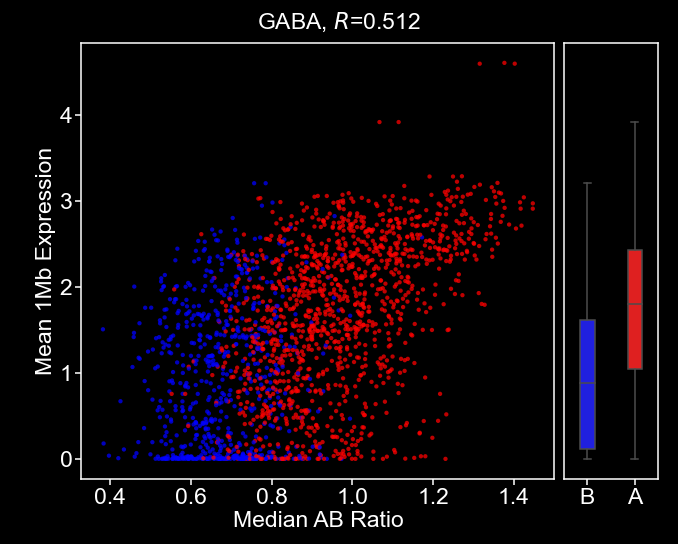

E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


<IPython.core.display.Javascript object>


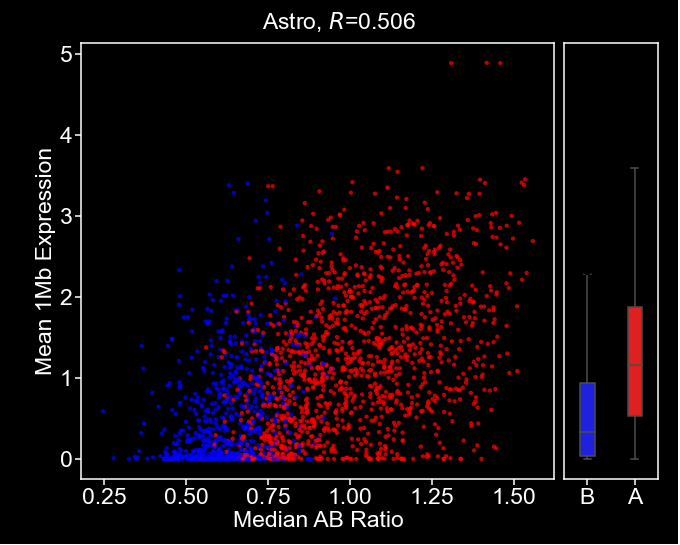

E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


<IPython.core.display.Javascript object>


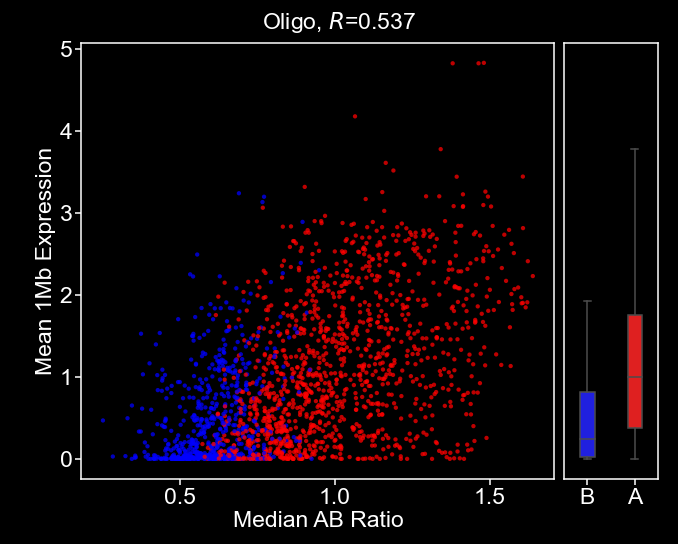

E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


<IPython.core.display.Javascript object>


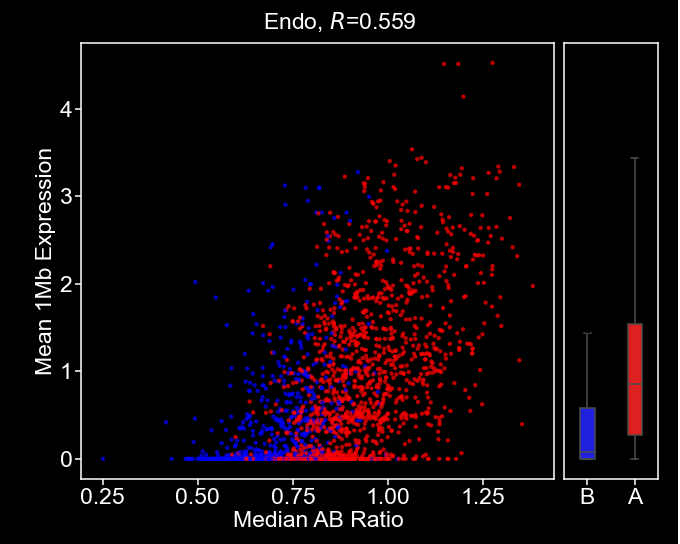

E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


<IPython.core.display.Javascript object>


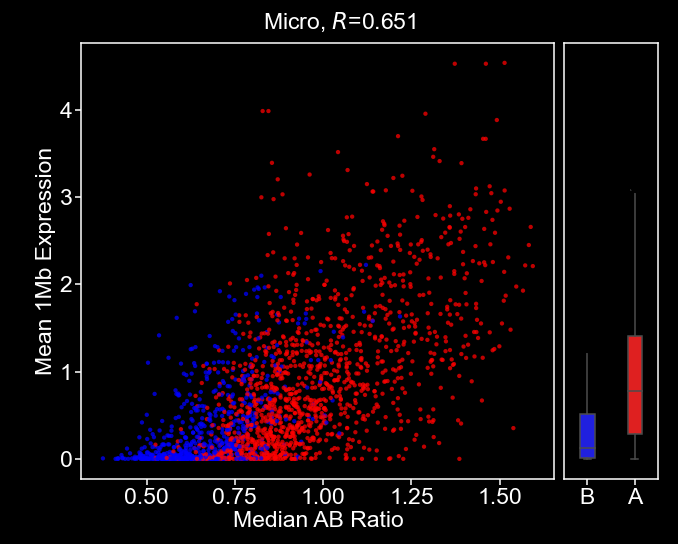

E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


<IPython.core.display.Javascript object>


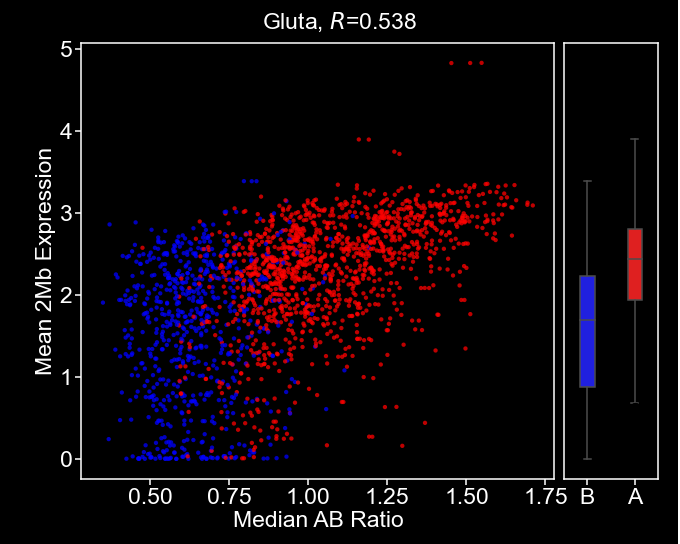

E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


<IPython.core.display.Javascript object>


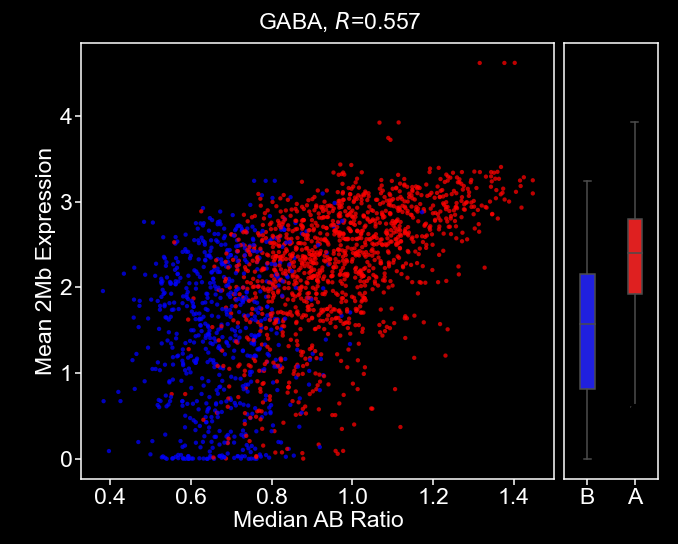

E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


<IPython.core.display.Javascript object>


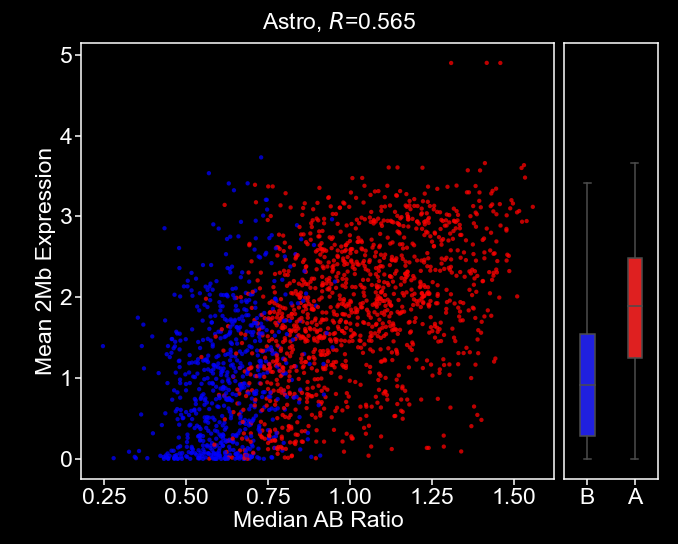

E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


<IPython.core.display.Javascript object>


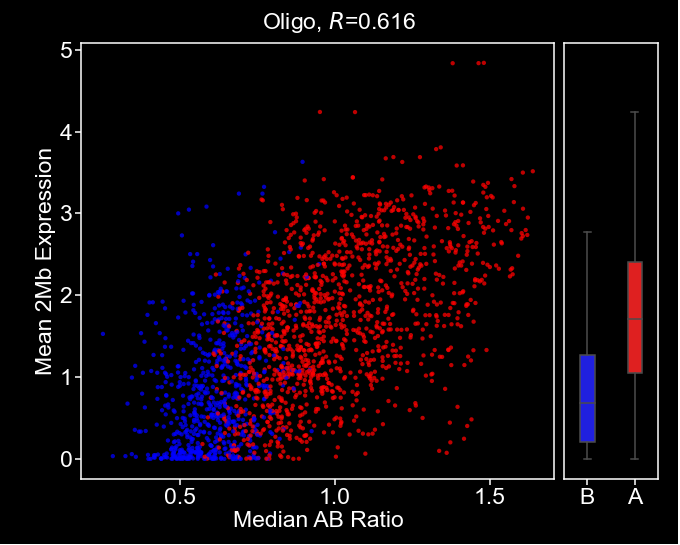

E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


<IPython.core.display.Javascript object>


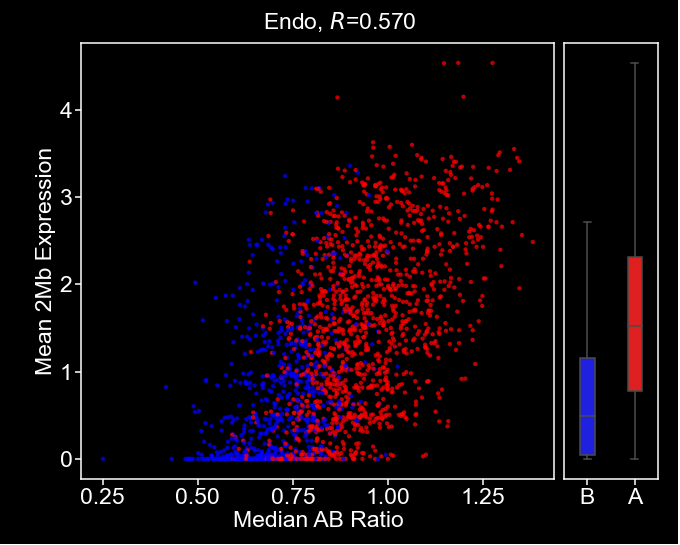

E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\puzheng\AppData\Local\Temp/ipykernel_43468/2006673822.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(_single_col_width*1.25, _single_col_width),dpi=200)


<IPython.core.display.Javascript object>


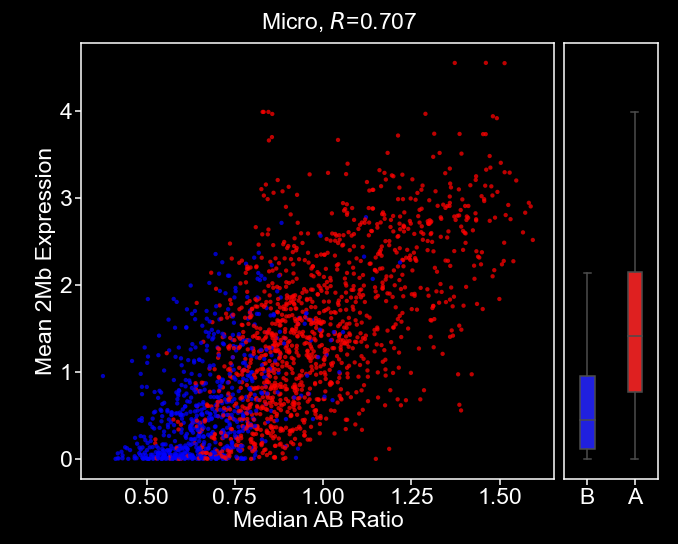

E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [12]:
for _adj_size in adj_sizes:
    #
    for _group in cell_types:
        # load expression df
        filename = os.path.join(result_folder, f"{_group}_genome_Adjacent_{_adj_size}.csv")
        adj_expression_df = pd.read_csv(filename)
        expression_mat = adj_expression_df.values[:,1:].astype(np.float64)
        # mean exp
        mean_expression = np.mean(expression_mat, axis=1)
        # median
        median_abratios = np.ones([len(codebook)]) * np.nan
        chr_2_ratios = {_chr:[] for _chr in chr_2_indices.keys()}
        for _i, _chr_2_abratios in enumerate(transABratio_dict[_group]):
            for _chr, _ratios in _chr_2_abratios.items():
                _inds = chr_2_indices[_chr]
                chr_2_ratios[_chr].extend(list(_ratios))
        for _chr in chr_2_ratios:
            median_abratios[chr_2_indices[_chr]] = np.nanmedian(chr_2_ratios[_chr], axis=0)

        info_dict = {
            'Compartment': AB_vec[:-1],
            'Median AB Ratio': median_abratios[:-1],
            f'Mean {_adj_size} Expression': mean_expression[:-1],
        }
        info_df = pd.DataFrame(info_dict)

        # plot
        comp_color_dict = {'A':'red', 'B':'blue'}
        fig, ax = plt.subplots(figsize=(_single_col_width*1.25, _single_col_width),dpi=200)

        sns.scatterplot(info_df['Median AB Ratio'], info_df[f'Mean {_adj_size} Expression'], hue=info_df['Compartment'],
                        ax=ax, s=2, alpha=0.75, linewidth=0, palette=comp_color_dict, legend=False)
        #ax.scatter(median_abratios[ensemble_AB_dict['A']], mean_expression[ensemble_AB_dict['A']], color='red' )
        #ax.scatter(median_abratios[ensemble_AB_dict['B']], mean_expression[ensemble_AB_dict['B']], color='blue' )
        ax.xaxis.labelpad = 1
        ax.yaxis.labelpad = 1

        ax.tick_params('both', labelsize=_font_size, 
                        width=_ticklabel_width, length=_ticklabel_size,
                        pad=1, labelleft=True, labelbottom=True) # remove bottom ticklabels for ax
        [i[1].set_linewidth(_ticklabel_width) for i in ax.spines.items()]


        divider = make_axes_locatable(ax)
        box_ax = divider.append_axes('right', size='20%', pad="2%", sharey=ax)
        _box_dict = sns.boxplot(x='Compartment', y=f'Mean {_adj_size} Expression', data=info_df,
                                palette=comp_color_dict, width=0.3, ax=box_ax, 
                                linewidth=_ticklabel_width,
                                fliersize=2,flierprops=dict(marker='o',markerfacecolor='None',markeredgecolor='black'),
                              )
        box_ax.set_xlabel('')
        box_ax.set_ylabel('')
        box_ax.tick_params('x', labelsize=_font_size, 
                        width=_ticklabel_width, length=_ticklabel_size,
                        pad=1, labelleft=False, labelbottom=True) # remove bottom ticklabels for ax
        box_ax.tick_params('y', labelsize=_font_size, 
                        width=_ticklabel_width, length=0,
                        pad=1, labelleft=False, labelbottom=True) 
        [i[1].set_linewidth(_ticklabel_width) for i in box_ax.spines.items()]

        # correlation
        valid_inds = np.isfinite(median_abratios) & np.isfinite(mean_expression)
        X = median_abratios[valid_inds, np.newaxis]
        y = mean_expression[valid_inds]
        reg = LinearRegression().fit(X, y)
        _r = np.sqrt(reg.score(X,y))

        fig.suptitle(f'{_group}, $R$={_r:.3f}', fontsize=_font_size, )
        fig.subplots_adjust(wspace=0.1, hspace=0., left=0.12, right=0.97, top=0.92, bottom=0.12)
        fig.savefig(os.path.join(gene_figure_folder, f"{_group}_allChr_ABRatio_transcription_{_adj_size}.pdf"),
                    transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=300)
        fig.savefig(os.path.join(gene_figure_folder, f"{_group}_allChr_ABRatio_transcription_{_adj_size}.png"),
                    transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=300)
        plt.show()

        

# MERFISH

In [13]:
result_folder = r'\\crick\SSD_0\Shiwei\DNA_MERFISH_analysis\Figures\draft_v1\Fig2_AB_MERFISH_expression\analyses\by_sum'
_adj_size = '1Mb'
cell_types = ['Gluta', 'GABA', 'Astro', 'Oligo', ]


E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


<IPython.core.display.Javascript object>


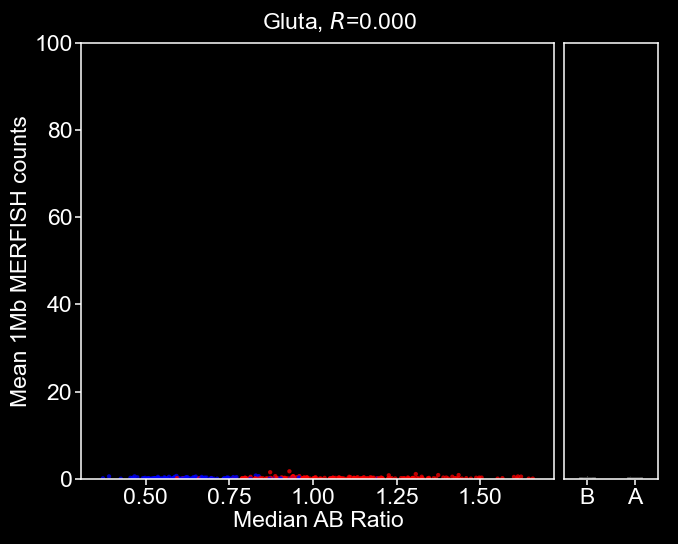

E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\puzheng\AppData\Local\Temp/ipykernel_43468/3460671176.py:62: RuntimeWarning: divide by zero encountered in log
  valid_inds = np.isfinite(median_abratios) & np.isfinite(np.log(mean_expression))
E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


<IPython.core.display.Javascript object>


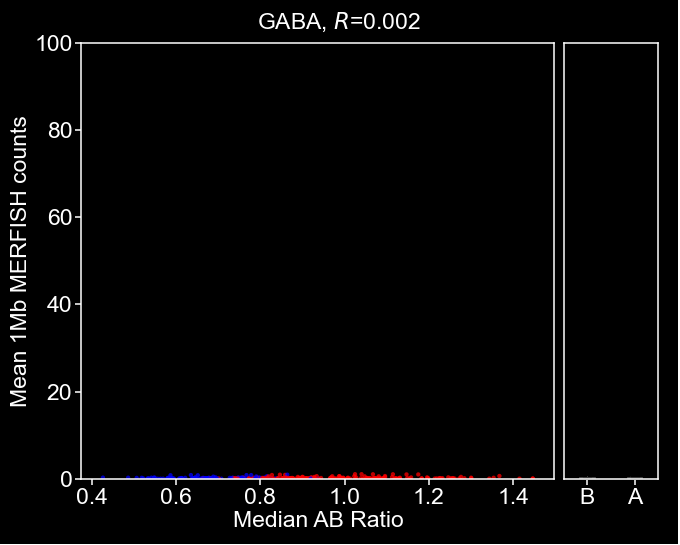

E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\puzheng\AppData\Local\Temp/ipykernel_43468/3460671176.py:62: RuntimeWarning: divide by zero encountered in log
  valid_inds = np.isfinite(median_abratios) & np.isfinite(np.log(mean_expression))
E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


<IPython.core.display.Javascript object>


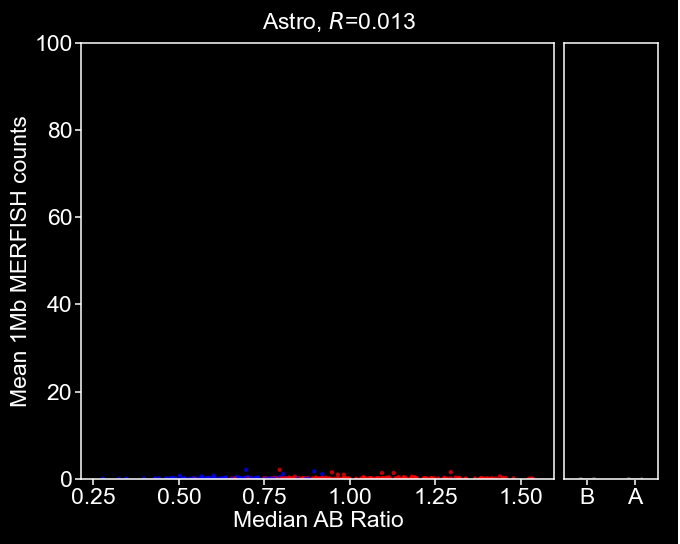

E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\puzheng\AppData\Local\Temp/ipykernel_43468/3460671176.py:62: RuntimeWarning: divide by zero encountered in log
  valid_inds = np.isfinite(median_abratios) & np.isfinite(np.log(mean_expression))
E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


<IPython.core.display.Javascript object>


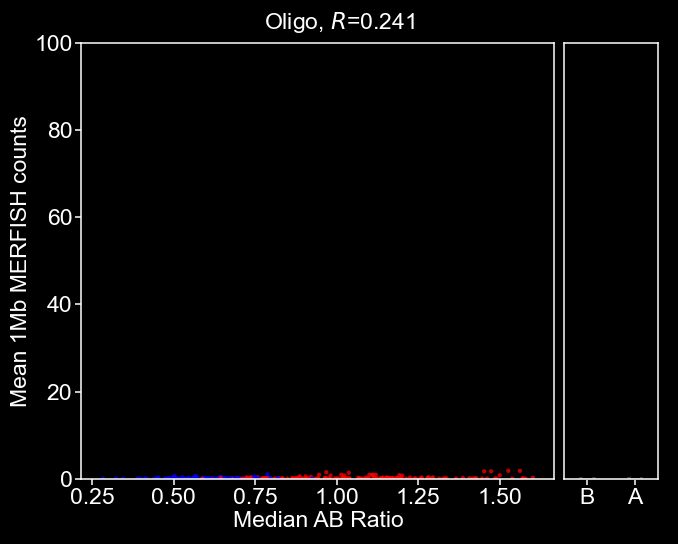

E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\puzheng\AppData\Local\Temp/ipykernel_43468/3460671176.py:62: RuntimeWarning: divide by zero encountered in log
  valid_inds = np.isfinite(median_abratios) & np.isfinite(np.log(mean_expression))


In [14]:
for _group in cell_types:
    # load expression df
    filename = os.path.join(result_folder, f"{_group}_genome_Adjacent_{_adj_size}.csv")
    adj_expression_df = pd.read_csv(filename)
    expression_mat = adj_expression_df.values[:,1:].astype(np.float64)
    # mean exp
    mean_expression = np.mean(np.exp(expression_mat)-1, axis=1)
    # median
    median_abratios = np.ones([len(codebook)]) * np.nan
    chr_2_ratios = {_chr:[] for _chr in chr_2_indices.keys()}
    for _i, _chr_2_abratios in enumerate(transABratio_dict[_group]):
        for _chr, _ratios in _chr_2_abratios.items():
            _inds = chr_2_indices[_chr]
            chr_2_ratios[_chr].extend(list(_ratios))
    for _chr in chr_2_ratios:
        median_abratios[chr_2_indices[_chr]] = np.nanmedian(chr_2_ratios[_chr], axis=0)

    info_dict = {
        'Compartment': AB_vec[:-1],
        'Median AB Ratio': median_abratios[:-1],
        f'Mean {_adj_size} MERFISH counts': mean_expression[:-1],
    }
    info_df = pd.DataFrame(info_dict)

    # plot
    comp_color_dict = {'A':'red', 'B':'blue'}
    fig, ax = plt.subplots(figsize=(_single_col_width*1.25, _single_col_width),dpi=200)

    sns.scatterplot(info_df['Median AB Ratio'], info_df[f'Mean {_adj_size} MERFISH counts'], hue=info_df['Compartment'],
                    ax=ax, s=2, alpha=0.75, linewidth=0, palette=comp_color_dict, legend=False)
    #ax.scatter(median_abratios[ensemble_AB_dict['A']], mean_expression[ensemble_AB_dict['A']], color='red' )
    #ax.scatter(median_abratios[ensemble_AB_dict['B']], mean_expression[ensemble_AB_dict['B']], color='blue' )
    ax.xaxis.labelpad = 1
    ax.yaxis.labelpad = 1

    ax.set_ylim([0,100])
    
    ax.tick_params('both', labelsize=_font_size, 
                    width=_ticklabel_width, length=_ticklabel_size,
                    pad=1, labelleft=True, labelbottom=True) # remove bottom ticklabels for ax
    [i[1].set_linewidth(_ticklabel_width) for i in ax.spines.items()]

    
    divider = make_axes_locatable(ax)
    box_ax = divider.append_axes('right', size='20%', pad="2%", sharey=ax)
    _box_dict = sns.boxplot(x='Compartment', y=f'Mean {_adj_size} MERFISH counts', data=info_df,
                            palette=comp_color_dict, width=0.3, ax=box_ax, 
                            linewidth=_ticklabel_width,
                            fliersize=2,flierprops=dict(marker='o',markerfacecolor='None',markeredgecolor='black'),
                          )
    box_ax.set_xlabel('')
    box_ax.set_ylabel('')
    box_ax.tick_params('x', labelsize=_font_size, 
                    width=_ticklabel_width, length=_ticklabel_size,
                    pad=1, labelleft=False, labelbottom=True) # remove bottom ticklabels for ax
    box_ax.tick_params('y', labelsize=_font_size, 
                    width=_ticklabel_width, length=0,
                    pad=1, labelleft=False, labelbottom=True) 
    [i[1].set_linewidth(_ticklabel_width) for i in box_ax.spines.items()]
    
    # correlation
    valid_inds = np.isfinite(median_abratios) & np.isfinite(np.log(mean_expression))
    X = median_abratios[valid_inds, np.newaxis]
    y = mean_expression[valid_inds]
    reg = LinearRegression().fit(X, y)
    _r = np.sqrt(reg.score(X,y))

    fig.suptitle(f'{_group}, $R$={_r:.3f}', fontsize=_font_size, )
    fig.subplots_adjust(wspace=0.1, hspace=0., left=0.12, right=0.97, top=0.92, bottom=0.12)
    fig.savefig(os.path.join(gene_figure_folder, f"MERFISH_{_group}_allChr_ABRatio_transcription_{_adj_size}.pdf"),
                transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=300)
    fig.savefig(os.path.join(gene_figure_folder, f"MERFISH_{_group}_allChr_ABRatio_transcription_{_adj_size}.png"),
                transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=300)
    plt.show()
    
    